In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data = pd.read_csv('C:/Users/vesc/OneDrive - Equinor/Documents/01_IFP_ML/04_lithofacies_prediction/train.csv', sep=';')
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [4]:
list(data.columns)

['WELL',
 'DEPTH_MD',
 'X_LOC',
 'Y_LOC',
 'Z_LOC',
 'GROUP',
 'FORMATION',
 'CALI',
 'RSHA',
 'RMED',
 'RDEP',
 'RHOB',
 'GR',
 'SGR',
 'NPHI',
 'PEF',
 'DTC',
 'SP',
 'BS',
 'ROP',
 'DTS',
 'DCAL',
 'DRHO',
 'MUDWEIGHT',
 'RMIC',
 'ROPA',
 'RXO',
 'FORCE_2020_LITHOFACIES_LITHOLOGY',
 'FORCE_2020_LITHOFACIES_CONFIDENCE']

Leaving only some columns to be used as features

In [3]:
data= data.drop([ 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED','SGR','SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO','FORCE_2020_LITHOFACIES_CONFIDENCE' ], axis=1)

data = data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'FACIES'})
data

data

,WELL,DEPTH_MD,X_LOC,Y_LOC,RDEP,RHOB,GR,NPHI,PEF,DTC,FACIES
0,15/9-13,494.5280,437641.96875,6470972.5,1.798681,1.884186,80.200851,NaN,20.915468,161.131180,65000
1,15/9-13,494.6800,437641.96875,6470972.5,1.795641,1.889794,79.262886,NaN,19.383013,160.603470,65000
2,15/9-13,494.8320,437641.96875,6470972.5,1.800733,1.896523,74.821999,NaN,22.591518,160.173615,65000
3,15/9-13,494.9840,437641.96875,6470972.5,1.801517,1.891913,72.878922,NaN,32.191910,160.149429,65000
4,15/9-13,495.1360,437641.96875,6470972.5,1.795299,1.880034,71.729141,NaN,38.495632,160.128342,65000
...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,2.527984,77.654900,NaN,4.586425,NaN,30000
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,2.537613,75.363937,NaN,7.019858,NaN,65030
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,2.491860,66.452843,NaN,9.049782,NaN,65030
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,2.447539,55.784817,NaN,8.903917,NaN,65030


Applying a logaritmic conversion to the RDEP values. 

In [4]:
data['RDEP_log10'] = np.log10(data['RDEP'])
data = data.drop('RDEP', axis=1)
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,RHOB,GR,NPHI,PEF,DTC,FACIES,RDEP_log10
0,15/9-13,494.5280,437641.96875,6470972.5,1.884186,80.200851,NaN,20.915468,161.131180,65000,0.254954
1,15/9-13,494.6800,437641.96875,6470972.5,1.889794,79.262886,NaN,19.383013,160.603470,65000,0.254220
2,15/9-13,494.8320,437641.96875,6470972.5,1.896523,74.821999,NaN,22.591518,160.173615,65000,0.255449
3,15/9-13,494.9840,437641.96875,6470972.5,1.891913,72.878922,NaN,32.191910,160.149429,65000,0.255638
4,15/9-13,495.1360,437641.96875,6470972.5,1.880034,71.729141,NaN,38.495632,160.128342,65000,0.254137
...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,2.527984,77.654900,NaN,4.586425,NaN,30000,NaN
1170507,7/1-2 S,3169.4644,NaN,NaN,2.537613,75.363937,NaN,7.019858,NaN,65030,NaN
1170508,7/1-2 S,3169.6164,NaN,NaN,2.491860,66.452843,NaN,9.049782,NaN,65030,NaN
1170509,7/1-2 S,3169.7684,NaN,NaN,2.447539,55.784817,NaN,8.903917,NaN,65030,NaN


In [5]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}
lithology_dict = {key: value for key, value in zip(lithology_keys.keys(), range(1, len(lithology_keys) + 1))}
lithology_dict
data['FACIES'] = data['FACIES'].map(lithology_dict)

In [6]:
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,RHOB,GR,NPHI,PEF,DTC,FACIES,RDEP_log10
0,15/9-13,494.5280,437641.96875,6470972.5,1.884186,80.200851,NaN,20.915468,161.131180,3,0.254954
1,15/9-13,494.6800,437641.96875,6470972.5,1.889794,79.262886,NaN,19.383013,160.603470,3,0.254220
2,15/9-13,494.8320,437641.96875,6470972.5,1.896523,74.821999,NaN,22.591518,160.173615,3,0.255449
3,15/9-13,494.9840,437641.96875,6470972.5,1.891913,72.878922,NaN,32.191910,160.149429,3,0.255638
4,15/9-13,495.1360,437641.96875,6470972.5,1.880034,71.729141,NaN,38.495632,160.128342,3,0.254137
...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,2.527984,77.654900,NaN,4.586425,NaN,1,NaN
1170507,7/1-2 S,3169.4644,NaN,NaN,2.537613,75.363937,NaN,7.019858,NaN,2,NaN
1170508,7/1-2 S,3169.6164,NaN,NaN,2.491860,66.452843,NaN,9.049782,NaN,2,NaN
1170509,7/1-2 S,3169.7684,NaN,NaN,2.447539,55.784817,NaN,8.903917,NaN,2,NaN


# Optional - Subsetting the data

In [7]:
data = data[(data['Y_LOC'] < 6700000) & (data['Y_LOC'] > 6500000)]
data
num_wells = data['WELL'].nunique()
well_counts = data['WELL'].value_counts()
print(well_counts)

25/2-7        25131
25/7-2        23879
25/4-5        23005
25/3-1        21186
25/2-13 T4    21062
26/4-1        19577
25/5-1        18473
25/2-14       15840
25/9-1        15743
25/8-5 S      14596
16/4-1        14082
25/5-4        12990
25/6-3        11985
16/2-11 A     10699
16/2-16       10025
16/2-6         9138
25/8-7         8644
25/11-19 S     6975
25/6-1         6209
25/11-5        5060
16/1-6 A       3623
16/5-3         3021
25/6-2         2925
25/11-15       2284
16/1-2         1734
Name: WELL, dtype: int64


# Splitting data

Remove some wells to use as a blind test later

In [8]:
blind_wells = data['WELL'].sample(n=1, random_state=42)
blind_data = data[data['WELL'].isin(blind_wells)]

train_data = data[~data['WELL'].isin(blind_wells)]

In [10]:
train_data['WELL'] = train_data['WELL'].astype('category')

C:\Users\vesc\AppData\Local\Temp\ipykernel_28628\3519982503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['WELL'] = train_data['WELL'].astype('category')


Define a color for each of the facies

In [11]:
train_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,RHOB,GR,NPHI,PEF,DTC,FACIES,RDEP_log10
53337,16/1-2,2645.580001,455221.34375,6533321.5,NaN,73.558113,NaN,NaN,88.159821,3,0.209256
53338,16/1-2,2645.732002,455221.34375,6533321.5,NaN,73.467598,NaN,NaN,88.724503,3,0.225137
53339,16/1-2,2645.884002,455221.34375,6533321.5,NaN,72.116478,NaN,NaN,88.763229,3,0.220020
53340,16/1-2,2646.036002,455221.34375,6533321.5,NaN,69.835365,NaN,NaN,88.972878,3,0.204630
53341,16/1-2,2646.188002,455221.34375,6533321.5,NaN,67.834320,NaN,NaN,89.675545,3,0.183443
...,...,...,...,...,...,...,...,...,...,...,...
467744,26/4-1,3673.920199,501174.09375,6608162.0,1.460340,89.799698,0.595052,13.240872,NaN,11,0.226277
467745,26/4-1,3674.072199,501174.12500,6608162.0,1.554299,93.024445,0.597195,13.042292,NaN,11,0.230075
467746,26/4-1,3674.224199,501174.12500,6608162.0,1.645840,99.999870,0.592170,12.733757,NaN,11,0.243849
467747,26/4-1,3674.376199,501174.12500,6608162.0,1.735518,106.294426,0.566001,11.692966,NaN,11,0.271152


In [12]:
facies_colors = ['#F4D03F', '#00a690', '#00ff00', '#36c796', '#AED6F1','#0099ff','#00ddff','#bbeaf3', '#cd9830', '#ff8c00', '#1b1a1a', '#886346' ]

facies_labels = ['Sandstone', 'Sandstone/Shale', 'Shale', 'Marl', 'Dolomite','Limestone', 'Chalk','Halite', 'Anhydrite', 'Tuff', 'Coal', 'Basement']

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

In [13]:
train_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,RHOB,GR,NPHI,PEF,DTC,FACIES,RDEP_log10
53337,16/1-2,2645.580001,455221.34375,6533321.5,NaN,73.558113,NaN,NaN,88.159821,3,0.209256
53338,16/1-2,2645.732002,455221.34375,6533321.5,NaN,73.467598,NaN,NaN,88.724503,3,0.225137
53339,16/1-2,2645.884002,455221.34375,6533321.5,NaN,72.116478,NaN,NaN,88.763229,3,0.220020
53340,16/1-2,2646.036002,455221.34375,6533321.5,NaN,69.835365,NaN,NaN,88.972878,3,0.204630
53341,16/1-2,2646.188002,455221.34375,6533321.5,NaN,67.834320,NaN,NaN,89.675545,3,0.183443
...,...,...,...,...,...,...,...,...,...,...,...
467744,26/4-1,3673.920199,501174.09375,6608162.0,1.460340,89.799698,0.595052,13.240872,NaN,11,0.226277
467745,26/4-1,3674.072199,501174.12500,6608162.0,1.554299,93.024445,0.597195,13.042292,NaN,11,0.230075
467746,26/4-1,3674.224199,501174.12500,6608162.0,1.645840,99.999870,0.592170,12.733757,NaN,11,0.243849
467747,26/4-1,3674.376199,501174.12500,6608162.0,1.735518,106.294426,0.566001,11.692966,NaN,11,0.271152


The feature with the less valid values is PEF, we will drop the observations that do not have a valid PE entry

In [16]:
train_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,RHOB,GR,NPHI,PEF,DTC,FACIES,RDEP_log10
53337,16/1-2,2645.580001,455221.34375,6533321.5,NaN,73.558113,NaN,NaN,88.159821,NaN,0.209256
53338,16/1-2,2645.732002,455221.34375,6533321.5,NaN,73.467598,NaN,NaN,88.724503,NaN,0.225137
53339,16/1-2,2645.884002,455221.34375,6533321.5,NaN,72.116478,NaN,NaN,88.763229,NaN,0.220020
53340,16/1-2,2646.036002,455221.34375,6533321.5,NaN,69.835365,NaN,NaN,88.972878,NaN,0.204630
53341,16/1-2,2646.188002,455221.34375,6533321.5,NaN,67.834320,NaN,NaN,89.675545,NaN,0.183443
...,...,...,...,...,...,...,...,...,...,...,...
467744,26/4-1,3673.920199,501174.09375,6608162.0,1.460340,89.799698,0.595052,13.240872,NaN,NaN,0.226277
467745,26/4-1,3674.072199,501174.12500,6608162.0,1.554299,93.024445,0.597195,13.042292,NaN,NaN,0.230075
467746,26/4-1,3674.224199,501174.12500,6608162.0,1.645840,99.999870,0.592170,12.733757,NaN,NaN,0.243849
467747,26/4-1,3674.376199,501174.12500,6608162.0,1.735518,106.294426,0.566001,11.692966,NaN,NaN,0.271152


In [14]:
PEF_mask = train_data['PEF'].notnull().values
train_data = train_data[PEF_mask]

In [15]:
train_data.dropna(inplace=True)
train_data

C:\Users\vesc\AppData\Local\Temp\ipykernel_28628\1254549080.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.dropna(inplace=True)


,WELL,DEPTH_MD,X_LOC,Y_LOC,RHOB,GR,NPHI,PEF,DTC,FACIES,RDEP_log10
55215,16/1-6 A,1197.867735,459499.50000,6539422.5,2.046551,36.851833,0.565047,7.166314,138.922913,1,0.086803
55216,16/1-6 A,1198.019735,459499.50000,6539422.5,1.935208,38.844902,0.531587,7.113382,142.348404,1,0.087614
55217,16/1-6 A,1198.171735,459499.50000,6539422.5,1.918874,39.834198,0.502625,7.110667,142.910080,1,0.088423
55218,16/1-6 A,1198.323735,459499.46875,6539422.5,1.928647,40.016376,0.506731,7.141164,140.185059,1,0.088544
55219,16/1-6 A,1198.475735,459499.46875,6539422.5,1.950093,40.241974,0.514303,7.176428,131.718079,1,0.088269
...,...,...,...,...,...,...,...,...,...,...,...
467728,26/4-1,3671.488200,501173.90625,6608162.0,1.892423,66.903862,0.185545,9.434887,64.627159,1,1.179778
467729,26/4-1,3671.640200,501173.93750,6608162.0,1.568371,67.388184,0.158148,10.083951,62.209316,1,1.043147
467730,26/4-1,3671.792200,501173.93750,6608162.0,1.373698,77.160065,0.167096,10.808287,62.122494,1,0.857488
467731,26/4-1,3671.944200,501173.93750,6608162.0,1.293105,95.544754,0.259774,11.640391,66.923286,11,0.709758


In [16]:
def make_facies_log_plot(logs, facies_colors):
    #make sure logs are sorted by depth
    logs = logs.sort_values(by='DEPTH_MD')
    cmap_facies = colors.ListedColormap(
            facies_colors[0:len(facies_colors)], 'indexed')
    
    ztop=logs.DEPTH_MD.min(); zbot=logs.DEPTH_MD.max()
    
    cluster=np.repeat(np.expand_dims(logs['FACIES'].values,1), 100, 1)
    
    f, ax = plt.subplots(nrows=1, ncols=6, figsize=(8, 12))
    ax[0].plot(logs.GR, logs.DEPTH_MD, '-g')
    ax[1].plot(logs.RDEP_log10, logs.DEPTH_MD, '-')
    ax[2].plot(logs.DTC, logs.DEPTH_MD, '-', color='0.5')
    ax[3].plot(logs.NPHI, logs.DEPTH_MD, '-', color='r')
    ax[4].plot(logs.PEF, logs.DEPTH_MD, '-', color='black')
    im=ax[5].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=1,vmax=9)
    
    divider = make_axes_locatable(ax[5])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((3*' ').join(['Sandstone', 'Sandstone/Shale', 'Shale', 'Marl', 'Dolomite',
                                  'Limestone', 'Chalk','Halite', 'Anhydrite', 'Tuff', 'Coal',
                                  'Basement']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("ILD_log10")
    ax[1].set_xlim(logs.RDEP_log10.min(),logs.RDEP_log10.max())
    ax[2].set_xlabel("DTC")
    ax[2].set_xlim(logs.DTC.min(),logs.DTC.max())
    ax[3].set_xlabel("NPHI")
    ax[3].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[4].set_xlabel("PE")
    ax[4].set_xlim(logs.PEF.min(),logs.PEF.max())
    ax[5].set_xlabel('Facies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([])
    ax[5].set_xticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=0.94)

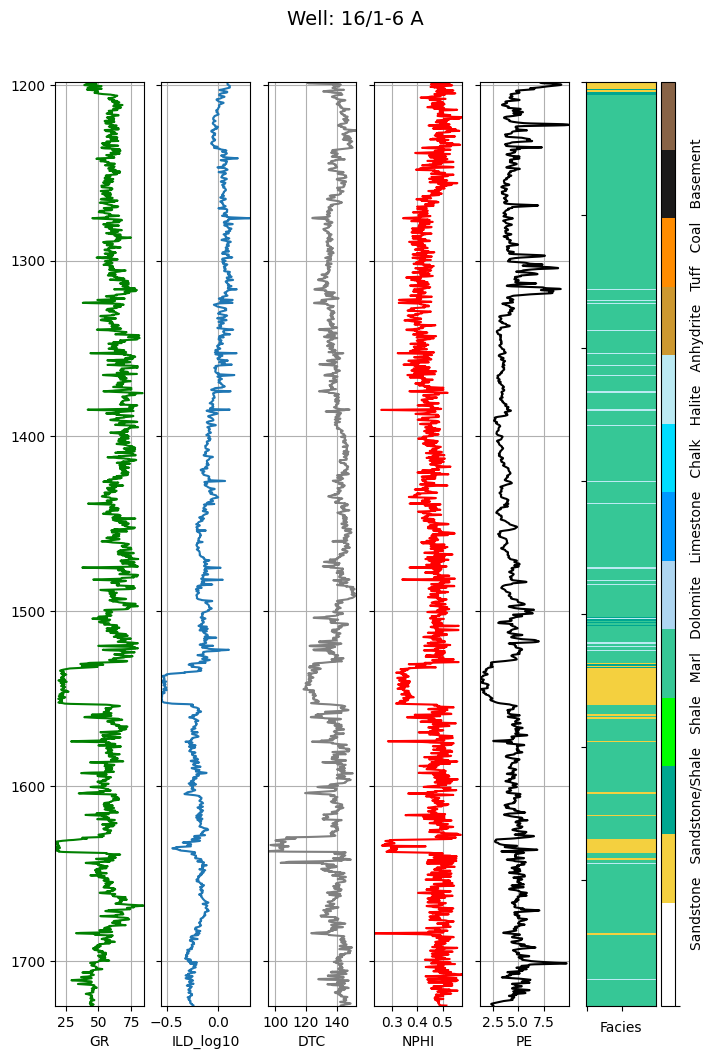

In [17]:
make_facies_log_plot(
    train_data[train_data['WELL'] == '16/1-6 A'],
    facies_colors)

In [18]:
facies_counts = train_data['FACIES'].value_counts().sort_index()

In [19]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = train_data['FACIES'].value_counts().sort_index()


#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

ValueError: Length mismatch: Expected axis has 10 elements, new values have 12 elements

# Conditioning the data set

In [23]:
train_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,RHOB,GR,NPHI,PEF,DTC,FACIES,RDEP_log10
55215,16/1-6 A,1197.867735,459499.50000,6539422.5,2.046551,36.851833,0.565047,7.166314,138.922913,1,0.086803
55216,16/1-6 A,1198.019735,459499.50000,6539422.5,1.935208,38.844902,0.531587,7.113382,142.348404,1,0.087614
55217,16/1-6 A,1198.171735,459499.50000,6539422.5,1.918874,39.834198,0.502625,7.110667,142.910080,1,0.088423
55218,16/1-6 A,1198.323735,459499.46875,6539422.5,1.928647,40.016376,0.506731,7.141164,140.185059,1,0.088544
55219,16/1-6 A,1198.475735,459499.46875,6539422.5,1.950093,40.241974,0.514303,7.176428,131.718079,1,0.088269
...,...,...,...,...,...,...,...,...,...,...,...
467728,26/4-1,3671.488200,501173.90625,6608162.0,1.892423,66.903862,0.185545,9.434887,64.627159,1,1.179778
467729,26/4-1,3671.640200,501173.93750,6608162.0,1.568371,67.388184,0.158148,10.083951,62.209316,1,1.043147
467730,26/4-1,3671.792200,501173.93750,6608162.0,1.373698,77.160065,0.167096,10.808287,62.122494,1,0.857488
467731,26/4-1,3671.944200,501173.93750,6608162.0,1.293105,95.544754,0.259774,11.640391,66.923286,11,0.709758


In [24]:
correct_facies_labels = train_data['FACIES'].values

feature_vectors = train_data.drop(['X_LOC','Y_LOC','WELL', 'DEPTH_MD','FACIES','FaciesLabels'], axis=1)
feature_vectors.describe()

KeyError: "['FaciesLabels'] not found in axis"

In [39]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=42)

In [41]:
from sklearn import svm

clf = svm.SVC()


In [42]:
clf.fit(X_train,y_train)

In [ ]:
predicted_labels = clf.predict(X_test)

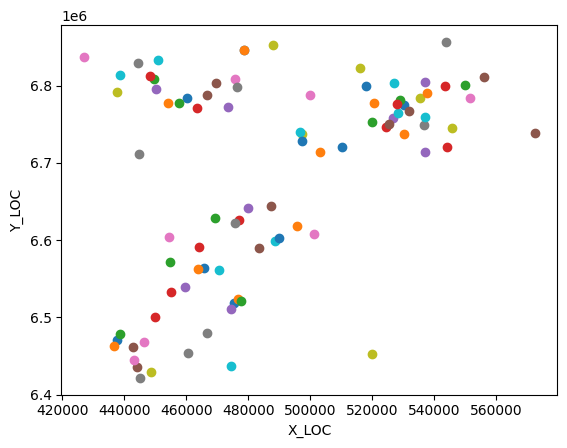

In [7]:
# Group the data by WELL and find the point with the minimum DEPTH
min_depth_points = data.groupby('WELL').apply(lambda x: x.loc[x['DEPTH_MD'].idxmin()])

# Plot the X-Y location
for _, point in min_depth_points.iterrows():
    plt.scatter(point['X_LOC'], point['Y_LOC'], label=point['WELL'])

plt.xlabel('X_LOC')
plt.ylabel('Y_LOC')

plt.show()


# Subsetting the data

In [8]:
subset_data = data[(data['Y_LOC'] < 6700000) & (data['Y_LOC'] > 6500000)]
subset_data
num_wells = subset_data['WELL'].nunique()
well_counts = subset_data['WELL'].value_counts()
print(well_counts)


25/2-7        25131
25/7-2        23879
25/4-5        23005
25/3-1        21186
25/2-13 T4    21062
26/4-1        19577
25/5-1        18473
25/2-14       15840
25/9-1        15743
25/8-5 S      14596
16/4-1        14082
25/5-4        12990
25/6-3        11985
16/2-11 A     10699
16/2-16       10025
16/2-6         9138
25/8-7         8644
25/11-19 S     6975
25/6-1         6209
25/11-5        5060
16/1-6 A       3623
16/5-3         3021
25/6-2         2925
25/11-15       2284
16/1-2         1734
Name: WELL, dtype: int64


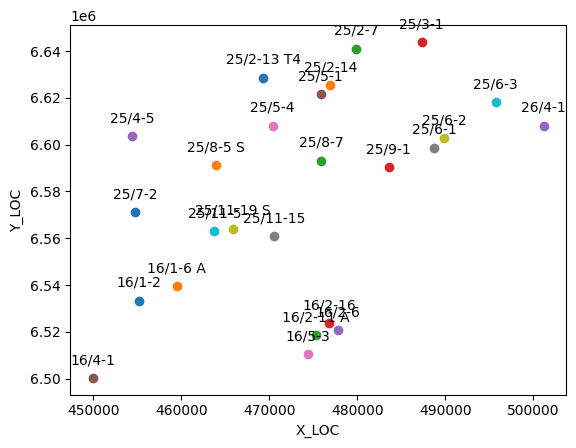

In [9]:
# Group the data by WELL and find the point with the minimum DEPTH
min_depth_points = subset_data.groupby('WELL').apply(lambda x: x.loc[x['DEPTH_MD'].idxmin()])

# Plot the X-Y location
for _, point in min_depth_points.iterrows():
    plt.scatter(point['X_LOC'], point['Y_LOC'], label=point['WELL'])
    plt.annotate(point['WELL'], (point['X_LOC'], point['Y_LOC']), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('X_LOC')
plt.ylabel('Y_LOC')

plt.show()

In [10]:
total_observations = subset_data.shape[0]
well_counts = subset_data['WELL'].value_counts()
total_wells = len(well_counts)
print("Well Counts:")
print(well_counts)
print("Total Observations:", total_observations)
print("Total Wells:", total_wells)

Well Counts:
25/2-7        25131
25/7-2        23879
25/4-5        23005
25/3-1        21186
25/2-13 T4    21062
26/4-1        19577
25/5-1        18473
25/2-14       15840
25/9-1        15743
25/8-5 S      14596
16/4-1        14082
25/5-4        12990
25/6-3        11985
16/2-11 A     10699
16/2-16       10025
16/2-6         9138
25/8-7         8644
25/11-19 S     6975
25/6-1         6209
25/11-5        5060
16/1-6 A       3623
16/5-3         3021
25/6-2         2925
25/11-15       2284
16/1-2         1734
Name: WELL, dtype: int64
Total Observations: 307886
Total Wells: 25


Splitting the data into train and test sets. 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split


# Select only 2 random wells as test data
blind_wells = subset_data['WELL'].sample(n=1, random_state=42)
blind_data = subset_data[subset_data['WELL'].isin(blind_wells)]

train_wells = subset_data[~subset_data['WELL'].isin(blind_wells)]['WELL'].sample(n=1, random_state=42)
train_data = subset_data[subset_data['WELL'].isin(train_wells)]



In [38]:
print("Blind Wells:", blind_wells.values)

Blind Wells: ['25/8-5 S']


In [43]:
print("Train Wells:", train_wells.values)

Train Wells: ['16/2-16']


In [44]:
total_observations = train_data.shape[0]
well_counts = train_data['WELL'].value_counts()
total_wells = len(well_counts)
print("Well Counts:")
print(well_counts)
print("Total Observations:", total_observations)
print("Total Wells:", total_wells)


Well Counts:
16/2-16    10025
Name: WELL, dtype: int64
Total Observations: 10025
Total Wells: 1


In [45]:
total_observations = blind_data.shape[0]
well_counts = blind_data['WELL'].value_counts()
total_wells = len(well_counts)
print("Well Counts:")
print(well_counts)
print("Total Observations:", total_observations)
print("Total Wells:", total_wells)

Well Counts:
25/8-5 S    14596
Name: WELL, dtype: int64
Total Observations: 14596
Total Wells: 1


In [46]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

C:\Users\vesc\AppData\Local\Temp\ipykernel_2000\3949142622.py:12: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in train_counts.iteritems():
C:\Users\vesc\AppData\Local\Temp\ipykernel_2000\3949142622.py:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in test_counts.iteritems():


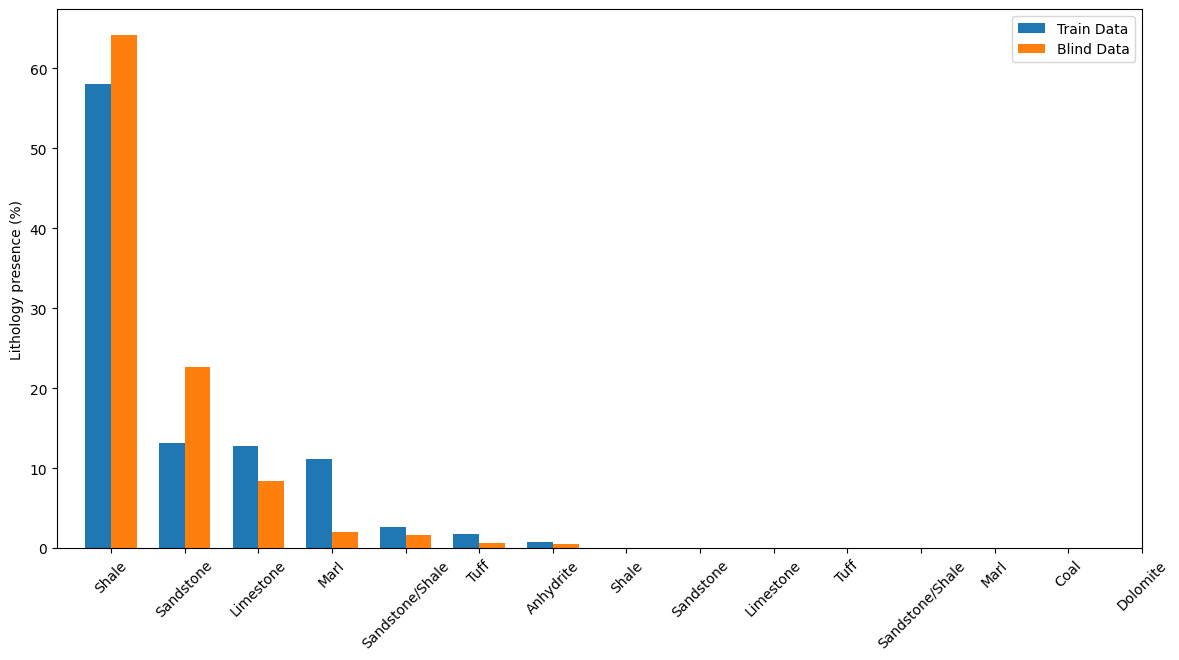

In [47]:
train_counts = train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
test_counts = blind_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

train_names = []
train_percentage = []
test_names = []
test_percentage = []

N_train = train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
N_test = blind_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]

for item in train_counts.iteritems():
    train_names.append(lithology_keys[item[0]])
    train_percentage.append(float(item[1])/N_train*100)

for item in test_counts.iteritems():
    test_names.append(lithology_keys[item[0]])
    test_percentage.append(float(item[1])/N_test*100)

fig, ax = plt.subplots(1, 1, figsize=(14, 7))
width = 0.35  # width of the bars

ax.bar(x=np.arange(len(train_names)), height=train_percentage, width=width, label='Train Data')
ax.bar(x=np.arange(len(test_names)) + width, height=test_percentage, width=width, label='Blind Data')
ax.set_xticks(np.arange(len(train_names + test_names)) + width/2)
ax.set_xticklabels(train_names + test_names, rotation=45)
ax.set_ylabel('Lithology presence (%)')
ax.legend()


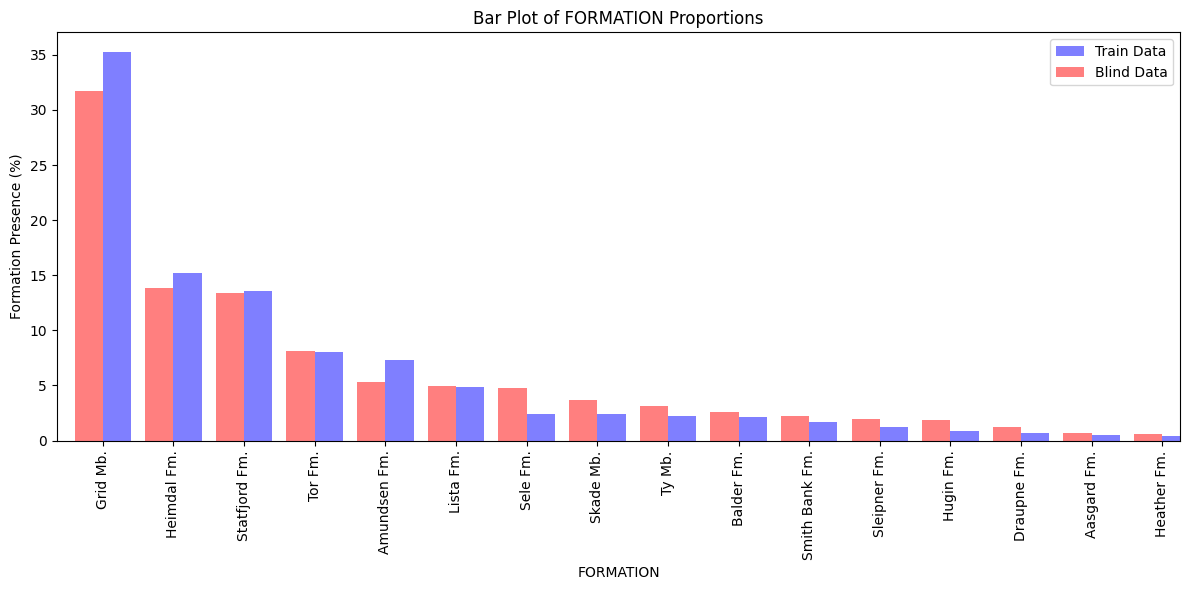

In [48]:
train_counts = train_data['FORMATION'].value_counts()
test_counts = blind_data['FORMATION'].value_counts()

train_proportions = train_counts / train_counts.sum()*100
test_proportions = test_counts / test_counts.sum()*100

fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure size

width = 0.4  # Adjust the width of the bars
train_proportions.plot(kind='bar', color='blue', alpha=0.5, label='Train Data', position=0, width=width)
test_proportions.plot(kind='bar', color='red', alpha=0.5, label='Blind Data', position=1, width=width)

ax.set_xlabel('FORMATION')
ax.set_ylabel('Formation Presence (%)')
ax.set_title('Bar Plot of FORMATION Proportions')
ax.legend()

plt.tight_layout()  # Add space between the bins

plt.show()


In [49]:
train_data.to_csv('C:/Appl/python_libraries/IFP_ML_Miniprojects/04_lithology_prediction/00_data/train_data.csv', index=False)
blind_data.to_csv('C:/Appl/python_libraries/IFP_ML_Miniprojects/04_lithology_prediction/00_data/blind_data.csv', index=False)
blind_data_no_facies = blind_data.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE'], axis=1)
blind_data_no_facies.to_csv('C:/Appl/python_libraries/IFP_ML_Miniprojects/04_lithology_prediction/00_data/blind_data_nofacies.csv', index=False)

# ML

In [50]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

facies_colors = ['#F4D03F', '#00a690', '#00ff00', '#36c796', '#AED6F1','#0099ff','#00ddff','#bbeaf3', '#cd9830', '#ff8c00', '#1b1a1a', '#886346' ]

facies_labels = ['Sandstone', 'Sandstone/Shale', 'Shale', 'Marl', 'Dolomite','Limestone', 'Chalk','Halite', 'Anhydrite', 'Tuff', 'Coal', 'Basement']

facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

In [22]:
#count the number of unique entries for each facies, sort them by
#facies number (instead of by number of entries)
facies_counts = train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts().sort_index()
#use facies labels to index each count
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

ValueError: Length mismatch: Expected axis has 8 elements, new values have 11 elements

In [54]:
len(train_data['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique())

7

In [55]:
train_data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [56]:
feature_vectors = train_data.drop(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED','SGR','SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO','FORCE_2020_LITHOFACIES_CONFIDENCE' ], axis=1)
feature_vectors.describe()

,RDEP,RHOB,GR,NPHI,PEF,DTC,FORCE_2020_LITHOFACIES_LITHOLOGY
count,10025.000000,9683.000000,10025.000000,9898.000000,9683.000000,9951.000000,10025.000000
mean,2.348347,2.209456,85.457099,0.382570,4.260216,125.482436,63467.124190
std,25.313340,0.181823,30.916713,0.127525,1.032569,28.851532,14458.465613
min,0.318176,1.732161,12.951102,0.003064,2.095339,48.621746,30000.000000
25%,0.767442,2.073498,66.734016,0.296297,3.531847,104.567440,65000.000000
50%,1.088220,2.160631,89.030411,0.422447,3.999938,139.798248,65000.000000
75%,1.444758,2.359909,106.611389,0.475887,4.760748,146.639832,70000.000000
max,1596.285523,2.744634,268.161072,0.749615,11.062059,177.843658,99000.000000


In [57]:
feature_vector_nan = feature_vectors.isnull().sum()
print(feature_vector_nan)
feature_vectors = feature_vectors.dropna()


correct_facies_labels = feature_vectors['FORCE_2020_LITHOFACIES_LITHOLOGY'].values

RDEP                                  0
RHOB                                342
GR                                    0
NPHI                                127
PEF                                 342
DTC                                  74
FORCE_2020_LITHOFACIES_LITHOLOGY      0
dtype: int64


In [58]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=42)

In [60]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train,y_train)
predicted_labels = clf.predict(X_test)

Prepare blind data

In [61]:
blind_vectors = blind_data.drop(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED','SGR','SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO','FORCE_2020_LITHOFACIES_CONFIDENCE' ], axis=1)
blind_vectors.describe()

blind_vectors = blind_vectors.dropna()

y_blind = blind_vectors['FORCE_2020_LITHOFACIES_LITHOLOGY'].values

In [62]:
X_blind = scaler.transform(blind_vectors)

In [63]:
y_pred = clf.predict(X_blind)
blind_vectors['Prediction'] = y_pred

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the true labels in y_true and the predicted labels in y_pred
precision = precision_score(y_blind, y_pred, average='weighted')
recall = recall_score(y_blind, y_pred, average='weighted')
f1 = f1_score(y_blind, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.9851371324499567
Recall: 0.9845741113346748
F1 Score: 0.9847201104338068


c:\Appl\petrophy\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Appl\petrophy\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
